**STEP 1 - IMPORT REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

**STEP 2 - LOAD FILES**

In [2]:
nyc_data = pd.read_csv("311_Service_Requests_from_2010_to_Present_min.csv")

In [3]:
print("Shape of the file:",nyc_data.shape)

Shape of the file: (6019843, 16)


In [4]:
nyc_data.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [5]:
nyc_data.dtypes

Unnamed: 0                  int64
Unique Key                  int64
Created Date               object
Closed Date                object
Complaint Type             object
Location Type              object
Incident Zip              float64
Incident Address           object
Street Name                object
Address Type               object
City                       object
Status                     object
Resolution Description     object
Borough                    object
Latitude                  float64
Longitude                 float64
dtype: object

**STEP 3 - DATA PRE-PROCESSING**

In [6]:
# Drop useless columns
nyc_data = nyc_data.drop(["Unnamed: 0","Closed Date","Address Type"],axis=1)

In [7]:
# Check missing data in the file
missing_data = nyc_data.isnull()

for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

False    6019843
Name: Unique Key, dtype: int64

False    6019843
Name: Created Date, dtype: int64

False    6019843
Name: Complaint Type, dtype: int64

False    5967019
True       52824
Name: Location Type, dtype: int64

False    5939146
True       80697
Name: Incident Zip, dtype: int64

False    5967018
True       52825
Name: Incident Address, dtype: int64

False    5967018
True       52825
Name: Street Name, dtype: int64

False    5939569
True       80274
Name: City, dtype: int64

False    6019843
Name: Status, dtype: int64

False    6012017
True        7826
Name: Resolution Description, dtype: int64

False    6019843
Name: Borough, dtype: int64

False    5939172
True       80671
Name: Latitude, dtype: int64

False    5939172
True       80671
Name: Longitude, dtype: int64



In [8]:
# Remove rows with missing information for "Incident Address","Incident Zip", "Latitude" and "Longitude"
print("Initial shape before removing the rows:",nyc_data.shape)

nyc_data.dropna(subset=["Incident Address"], axis=0, inplace=True)
nyc_data.dropna(subset=["Incident Zip"], axis=0, inplace=True)
nyc_data.dropna(subset=["Latitude"], axis=0, inplace=True)
nyc_data.dropna(subset=["Longitude"], axis=0, inplace=True)

Initial shape before removing the rows: (6019843, 13)


In [9]:
# Remove rows with borough no specified
nyc_data.drop(nyc_data.loc[nyc_data['Borough']=="Unspecified"].index, inplace=True)
nyc_data["Borough"].value_counts()

BROOKLYN         1731202
BRONX            1609837
MANHATTAN        1049360
QUEENS            641741
STATEN ISLAND      87187
Name: Borough, dtype: int64

In [10]:
# Reset index values with the new rows
nyc_data.reset_index(drop=True, inplace=True)
print("New shape after removing the rows:",nyc_data.shape)

New shape after removing the rows: (5119327, 13)


In [12]:
# Capitalize "Complaint Type" and "Location Type" columns
nyc_data["Complaint Type"] = nyc_data["Complaint Type"].str.upper()
nyc_data["Location Type"] = nyc_data["Location Type"].str.upper()
nyc_data["Incident Address"] = nyc_data["Incident Address"].str.upper()

In [13]:
# Convert Created Date column to datatime
# Useful information obtained from: https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior
nyc_data['Created Date'] = pd.to_datetime(nyc_data['Created Date'], format="%m/%d/%Y %H:%M:%S %p")

In [14]:
# Create new columns with the year and month of the complaint
nyc_data['Created Year'] = nyc_data['Created Date'].map(lambda x: x.strftime('%Y')).astype(int)
nyc_data['Created Month'] = nyc_data['Created Date'].map(lambda x: x.strftime('%m')).astype(int)

**STEP 4 - DATA ANALYSIS**  
**Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?**

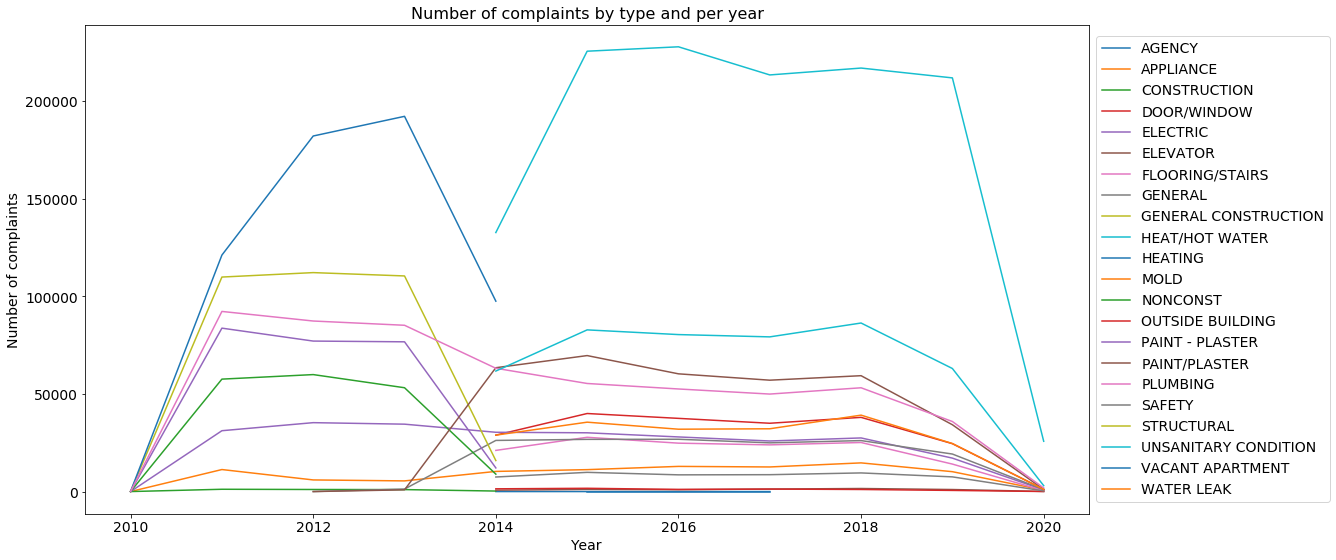

In [15]:
# Visualize the complaints types and how many times it has happened
complaint_types_year = nyc_data.groupby(['Created Year', 'Complaint Type']).count()['Unique Key'].unstack()

complaint_types_year.plot(figsize=(18,9),fontsize=14)

plt.title("Number of complaints by type and per year",fontsize=16)
plt.ylabel("Number of complaints",fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.legend(fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))

**We can see how "HEATING" complaint was replaced by "HEAT/HOT WATER" complaint on 2014. For this reason we have to merge both complaints.  
Furthermore, we have to merge both "PAINT - PLASTER" and "PAINT/PLATER" complaints as well.**

In [16]:
# Merge "HEATING" and "HEAT/HOT WATER" complaints
nyc_data.loc[nyc_data["Complaint Type"]=="HEAT/HOT WATER", "Complaint Type"] = "HEATING"

In [17]:
# Merge "PAINT - PLASTER" and "PAINT/PLASTER" complaints
nyc_data.loc[nyc_data["Complaint Type"]=="PAINT - PLASTER", "Complaint Type"] = "PAINT/PLASTER"

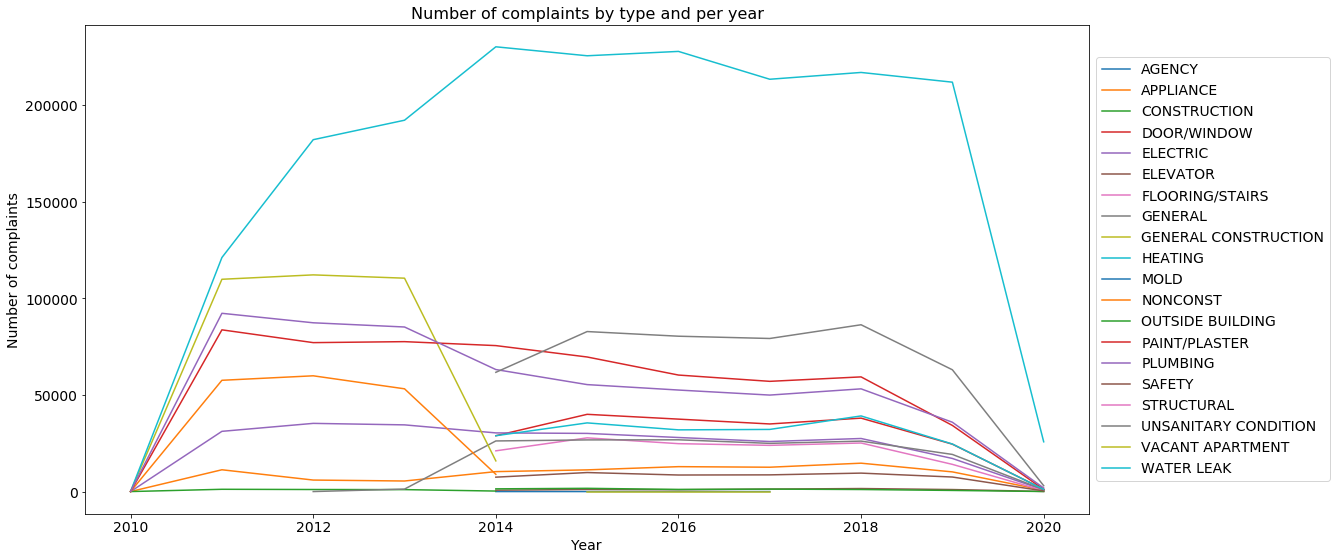

In [18]:
# Visualize the complaints types and how many times it has happened
complaint_types_year = nyc_data.groupby(['Created Year', 'Complaint Type']).count()['Unique Key'].unstack()

complaint_types_year.plot(figsize=(18,9),fontsize=14)

plt.title("Number of complaints by type and per year",fontsize=16)
plt.ylabel("Number of complaints",fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.legend(fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))

**Now we will focus on the total number of complaints by each type**

In [19]:
# Extract the types of complaints and how many times it has happened
complaint_types = nyc_data["Complaint Type"].value_counts()
complaint_types.sort_values(inplace=True)

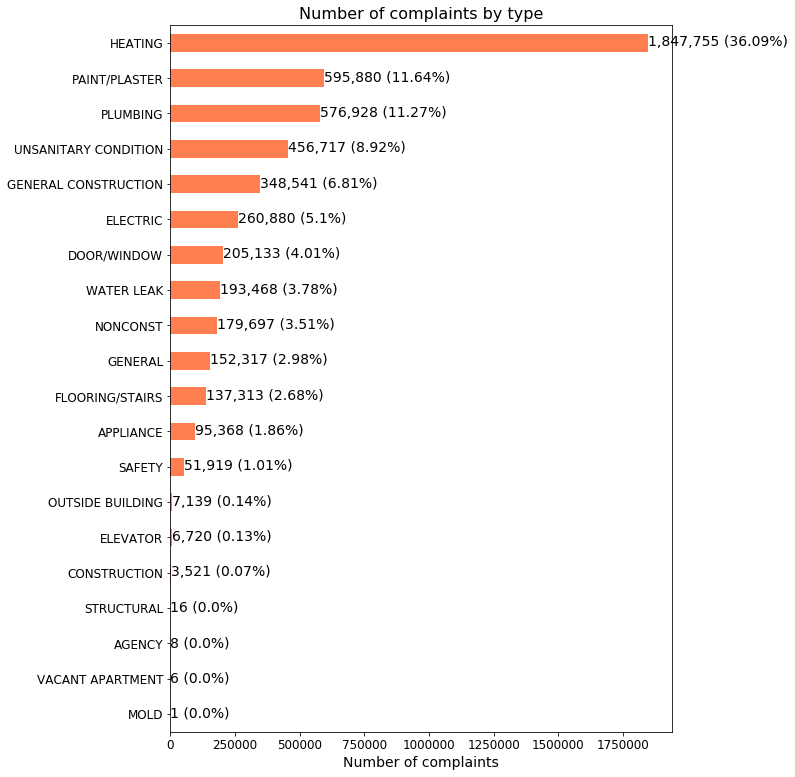

In [20]:
# Visualize the complaints types and how many times it has happened
complaint_types.plot(kind='barh', 
                     figsize=(9,13),
                     color="coral",
                     fontsize=12)

plt.title("Number of complaints by type",fontsize=16)
plt.xlabel("Number of complaints",fontsize=14)

# Annotate value labels to each country
for index, value in enumerate(complaint_types): 
    
    total = format(int(value), ',') # format int with commas
    percentage = np.round((value / sum(complaint_types))*100, 2)
    percentage = str(percentage)
    
    label = total + " " + "(" + percentage + "%)"
    
    # Place text at the end of bar (subtracting 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value, index-0.1 ), color='black', fontsize=14)

plt.show()

**Finally we are going to check how the Heating complaints vary throughout the year**

In [21]:
df_heating = nyc_data.loc[nyc_data['Complaint Type'] == "HEATING"]
df_heating.reset_index(drop=True, inplace=True)

Text(0.5, 0, 'Month')

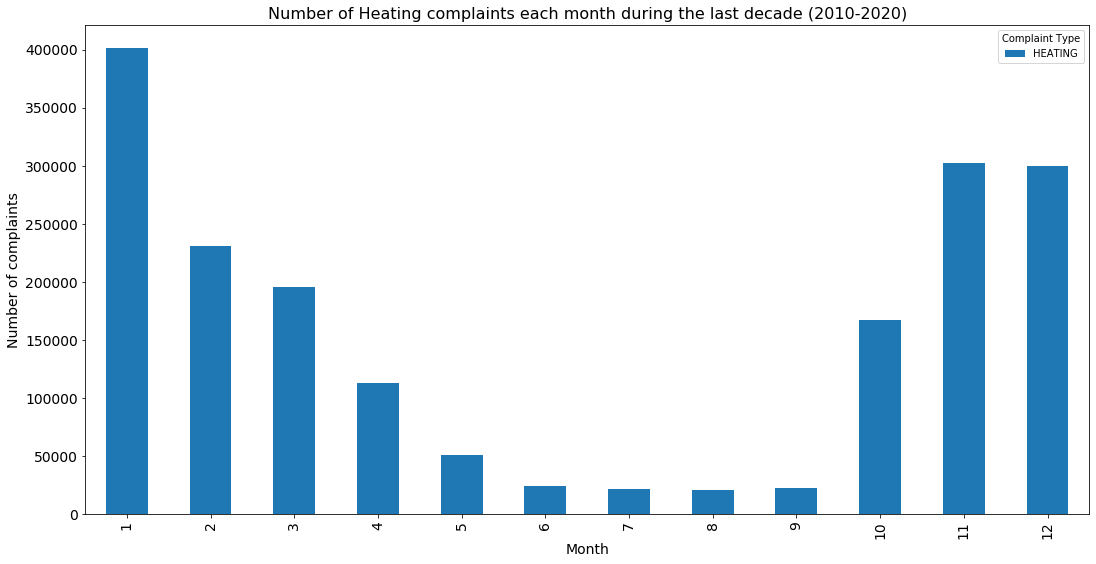

In [22]:
# Visualize the Heating complaints and how many times it happens during the year
complaint_types_month = df_heating.groupby(['Created Month', 'Complaint Type']).count()['Unique Key'].unstack()

complaint_types_month.plot(kind="bar",figsize=(18,9),fontsize=14)

plt.title("Number of Heating complaints each month during the last decade (2010-2020)",fontsize=16)
plt.ylabel("Number of complaints",fontsize=14)
plt.xlabel("Month",fontsize=14)

**STEP 5 - CONCLUSIONS**

After analyzing the data provided by the Department of Housing Preservation and Development of New York to study the complaints ocurred during the last decade (2010 - 2020), we can conclude that **heating complaints were the highest, with around 36% of the total.   
Furthermore we can observe how this type of complaints ocurred mainly during the winter session (November - January)**  

In [23]:
# Save cleaned file for future analysis
nyc_data.to_csv(r'nyc_data_pre.csv')